# Fandango's Movie Ratings Analysis

### Data source:
#### https://fivethirtyeight.com/features/fandango-movies-ratings/

In [2]:
#libriaries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fandango's data

In [3]:
#creating data frame (import from csv file)
fandango = pd.read_csv('fandango_scrape.csv')

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Votes vs rating

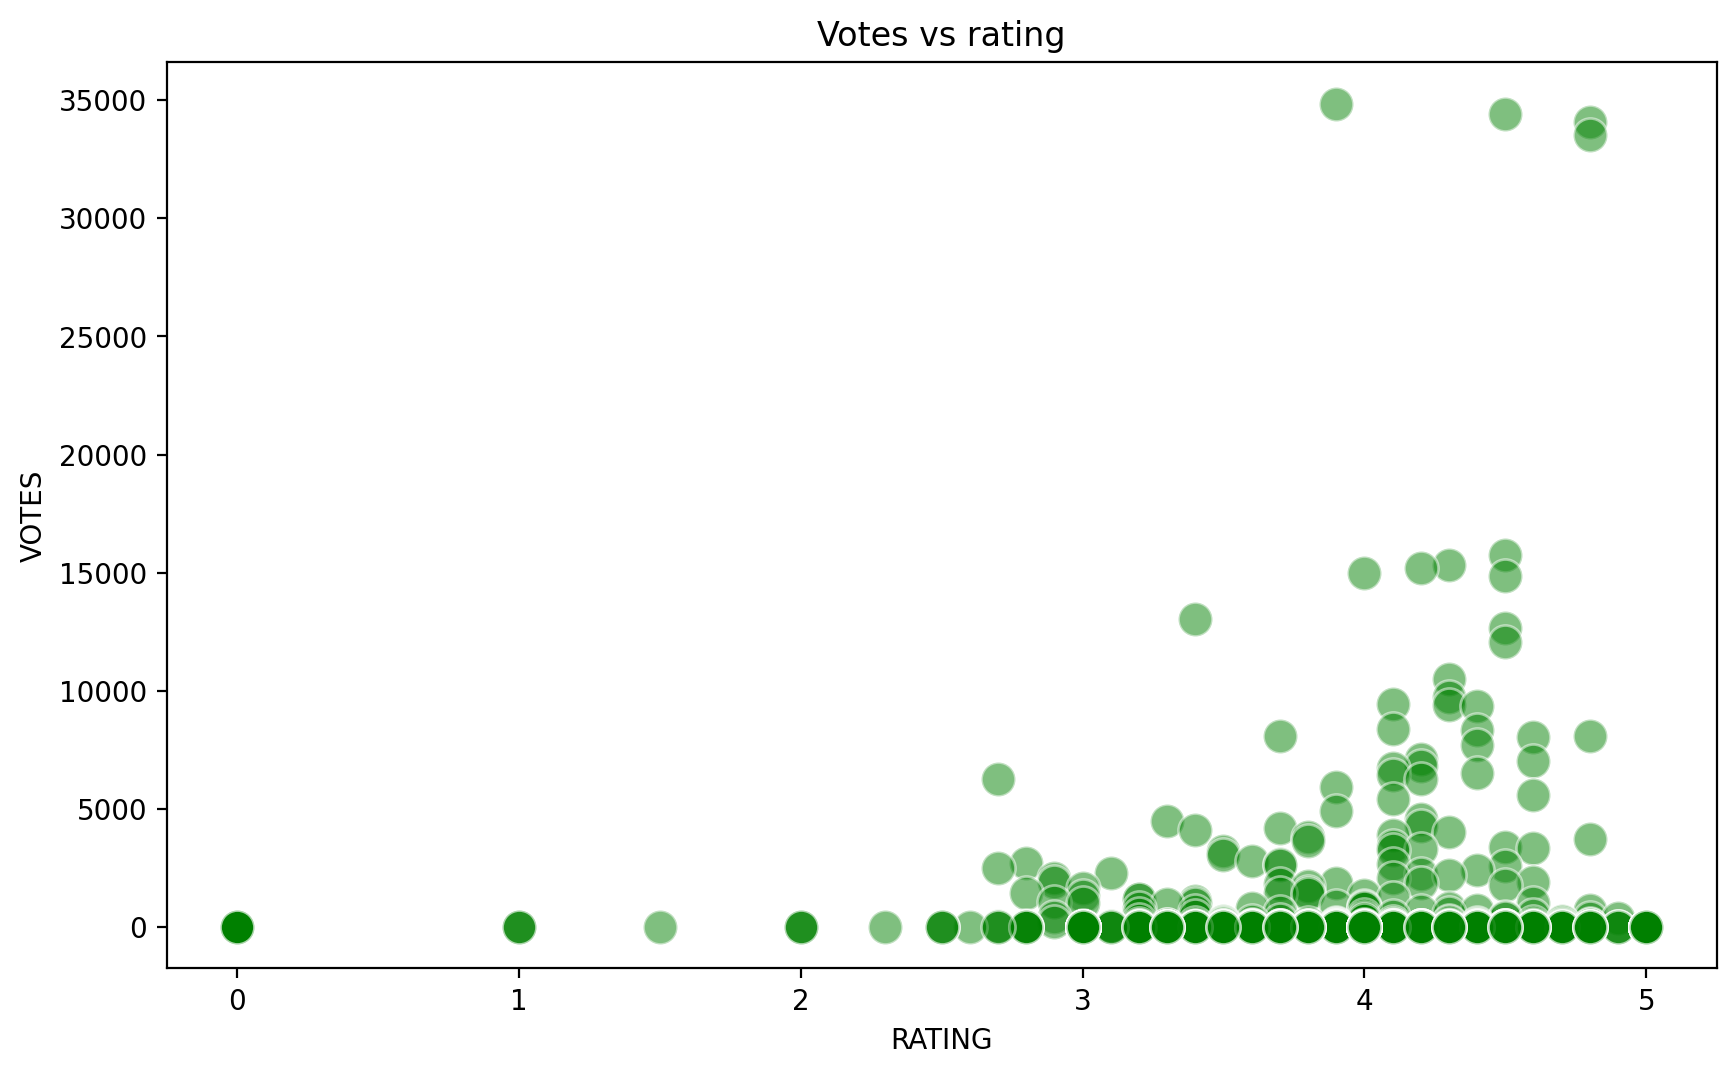

In [52]:
plt.figure(figsize=(10,6), dpi=200) #plot size
sns.scatterplot(data=fandango, x='RATING', y='VOTES',s=150, alpha=0.5, color='green')
plt.title('Votes vs rating')
plt.show()

#### 75% of movies received less than 189 votes

### Correlation between columns

In [27]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Extracting year from the "FILM" column, adding new "YEAR" column

In [41]:
#function definition
#def get_year(film):
    #return int(film[-5:-1])

#YEAR from FILM column
#fandango['YEAR'] = fandango['FILM'].apply(get_year)    

fandango['YEAR'] = fandango['FILM'].apply(lambda film:int(film[-5:-1])) #using lambda expression  

In [42]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Movies per year

In [48]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

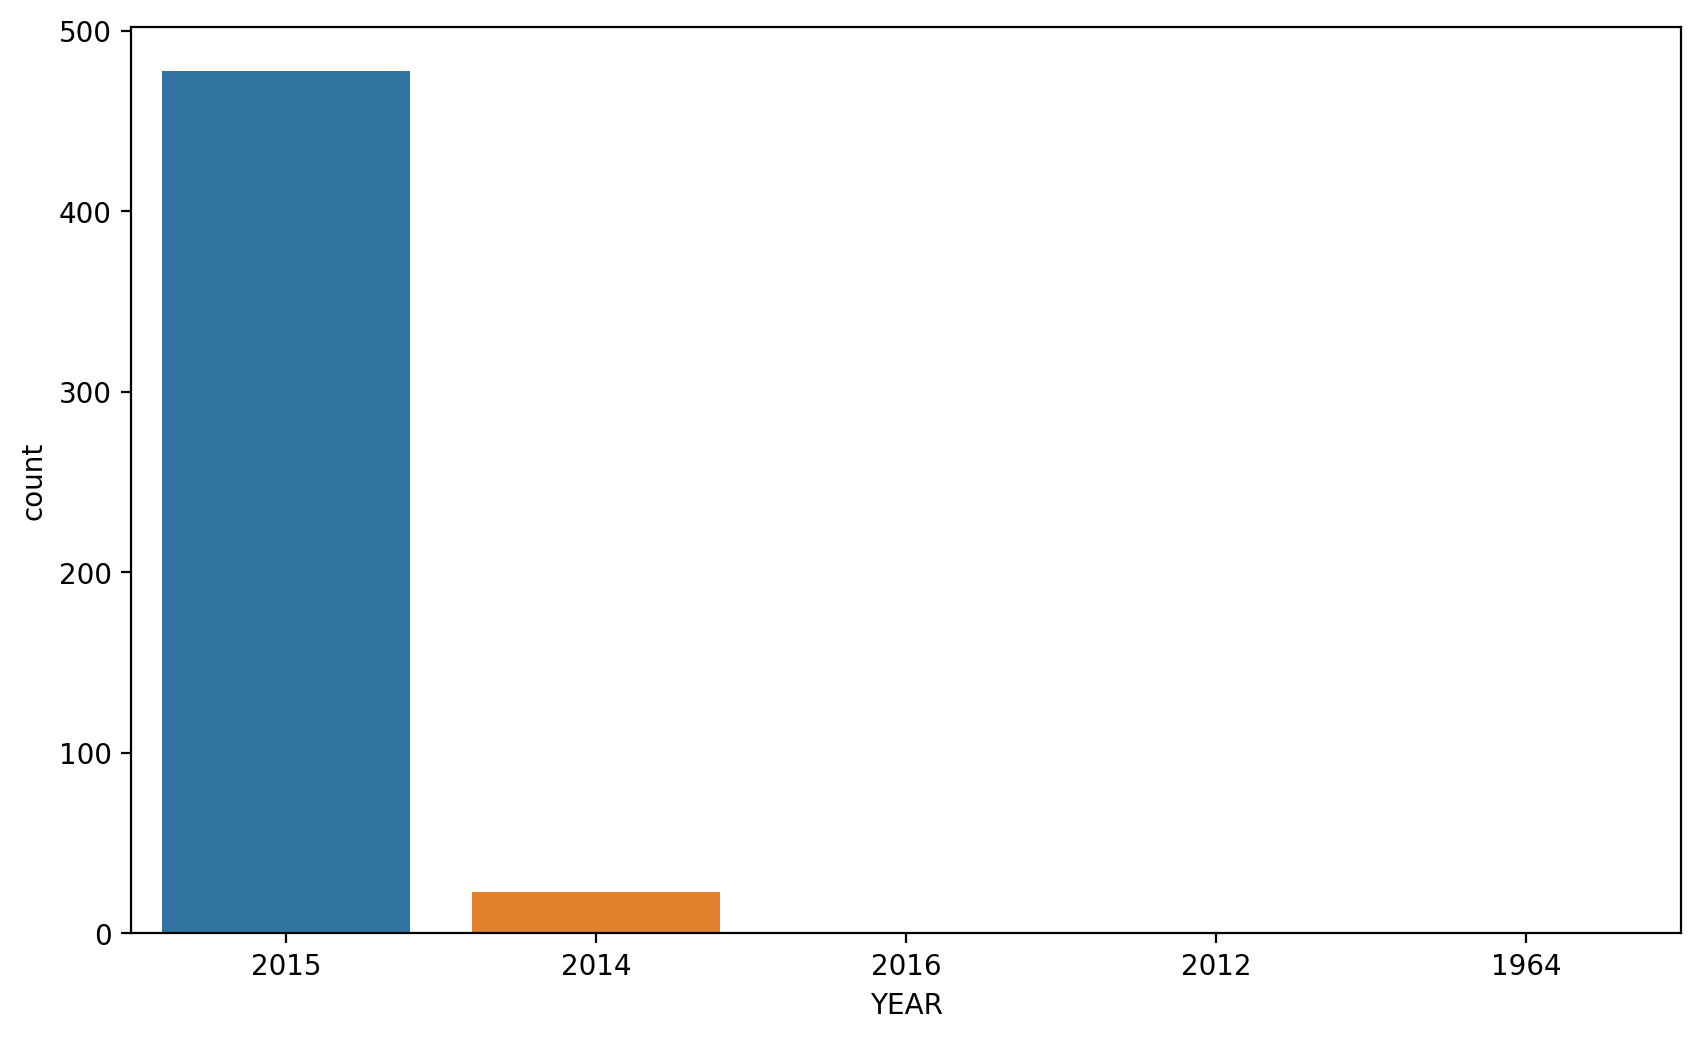

In [51]:
plt.figure(figsize = (10,6), dpi=200)
sns.countplot(data=fandango, x='YEAR', order = fandango['YEAR'].value_counts().index)
plt.show()

### TOP10 movies with the highest number of votes

In [66]:
top10_votes = fandango.sort_values(by=['VOTES'], axis=0, ascending=False)
top10_votes = top10_votes[0:10]
top10_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Movies with 0 votes

In [67]:
no_votes = fandango[fandango['VOTES'] == 0]
len(no_votes.index)

69

### Data frame without movies with 0 votes

In [73]:
fandango_voted = fandango[fandango['VOTES']>0]
#fandango_voted['VOTES'].unique()

### True user rating vs diplayed star rating

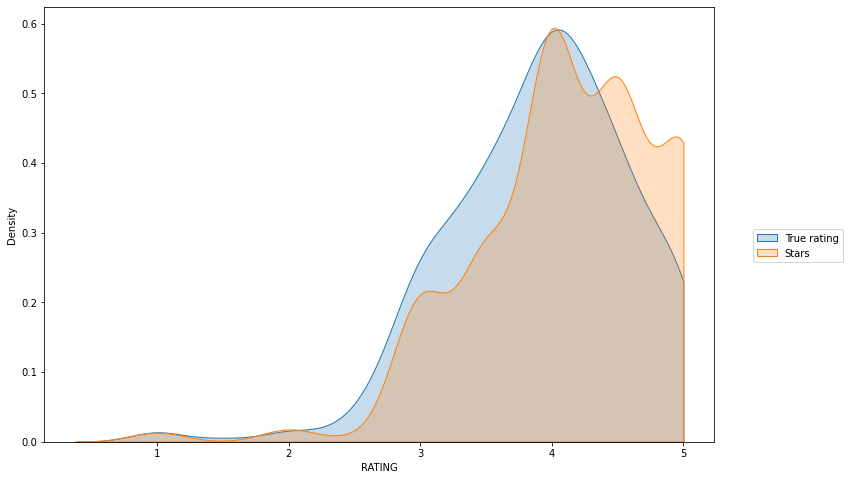

In [107]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=fandango_voted, x='RATING', clip=(0,5), label='True rating', fill=True)
sns.kdeplot(data=fandango_voted, x='STARS', clip=(0,5), label='Stars', fill=True)

plt.legend(bbox_to_anchor=(1.2,0.5))

### Difference between STARS and TRUE RATING

In [125]:
fandango_voted['STARS_DIFF'] = fandango_voted['STARS'] - fandango_voted['RATING']
fandango_voted['STARS_DIFF'] = fandango_voted['STARS_DIFF'].round(2)
fandango_voted

/home/luka/anaconda3/envs/Udemy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/luka/anaconda3/envs/Udemy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

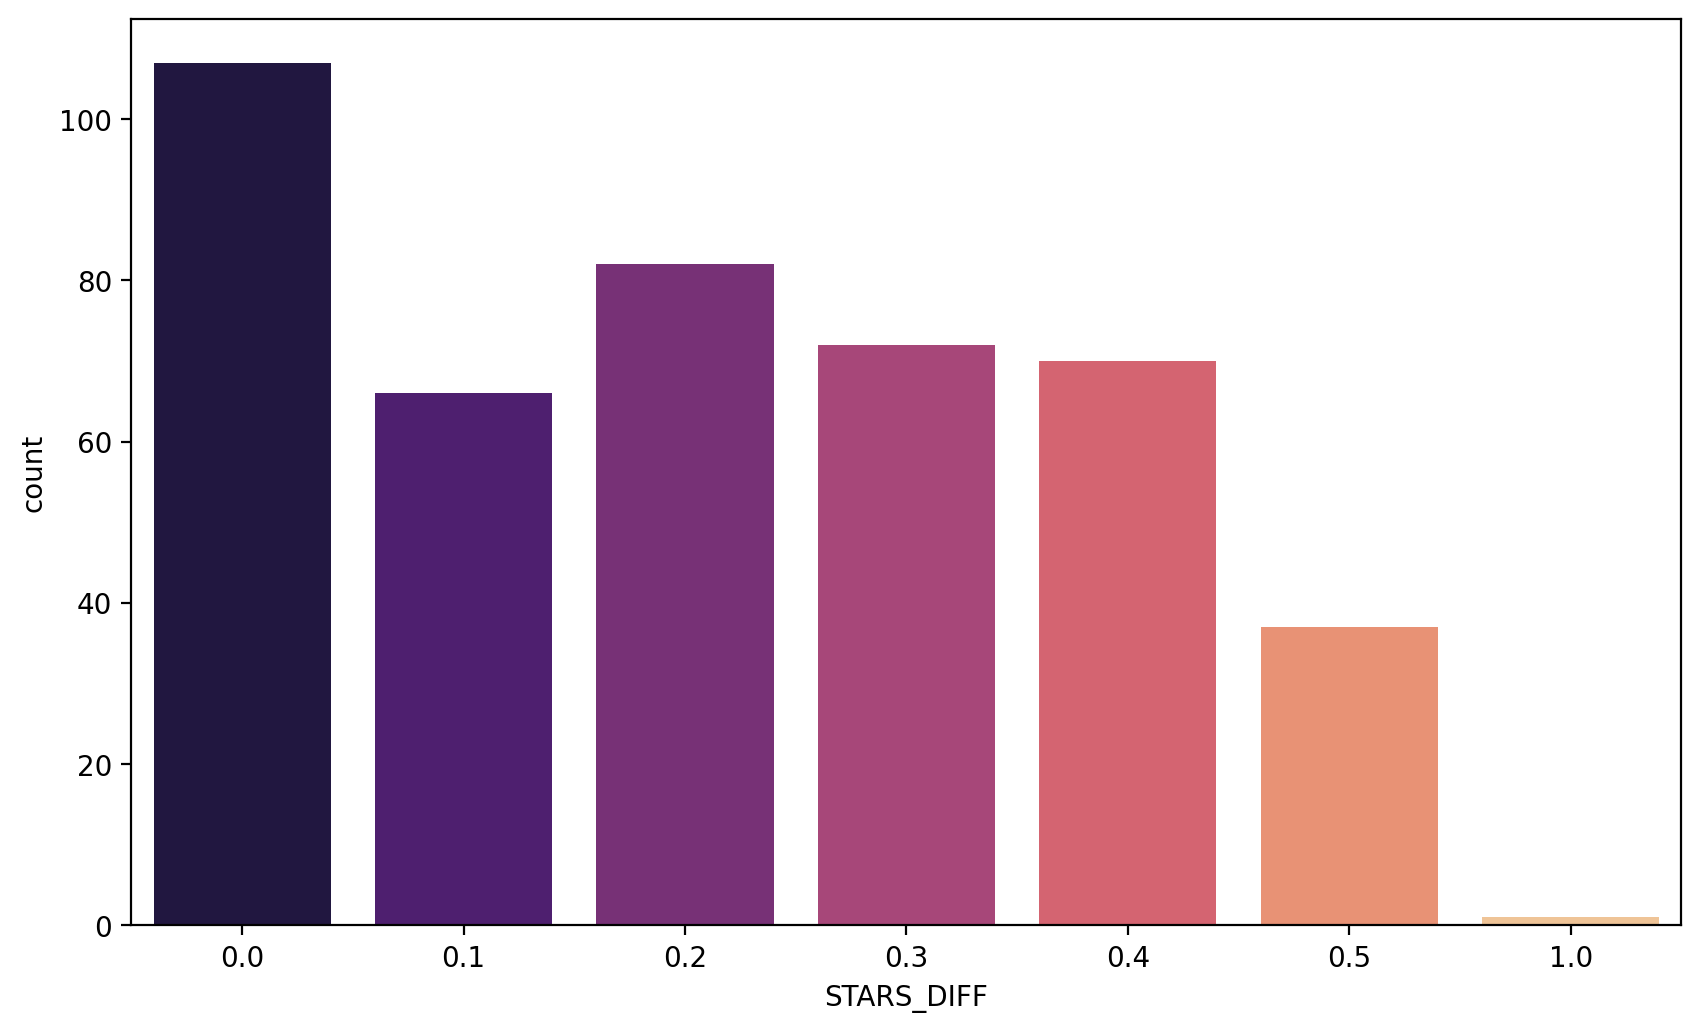

In [127]:
plt.figure(figsize = (10,6), dpi=200)
sns.countplot(data=fandango_voted, x='STARS_DIFF', palette='magma')

In [144]:
fandango_voted.sort_values(by=['STARS_DIFF'],ascending=False, axis=0)[:1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
